In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
train = datasets.MNIST(root = "./dataset", train=True, transform=transforms.ToTensor(), download=True)
test = datasets.MNIST(root = "./dataset", train=False, transform=transforms.ToTensor(), download=True)

train_dataloader = DataLoader(train, batch_size=100, shuffle=True) 
test_dataloader = DataLoader(test, batch_size=1000, shuffle=False) 

t_size = max(train.targets) - min(train.targets) + 1
print("라벨 종류 : {}".format(t_size))

라벨 종류 : 10


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
e = 0

F = nn.Sequential(
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
)
F = F.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(F.parameters(), lr = 0.1)
epoch = 30
prev_acc = 0
acc_cnt = 0

for e in range(epoch) :
    loss_sum = 0
    for x, t in train_dataloader :
        #y = F(x)
        x = x.to(device)
        t = t.to(device)
        x = x.reshape(x.shape[0],28*28)
        y = F(x)
        #손실함수
        loss = loss_function(y, t)
        loss_sum += loss
        #최적화함수
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    loss_sum /= len(train_dataloader)

    correct = 0
    total = 0
    for x, t in test_dataloader :
        x = x.to(device)
        t = t.to(device)
        x = x.reshape(x.shape[0],28*28)
        with torch.no_grad() :
            y = F(x)
        for i in range(len(x)) :
            if torch.argmax(y[i]) == t[i] :
                correct += 1
            total += 1
    acc = correct / total
    if acc <= prev_acc + 0.001 :
        acc_cnt += 1
    else :
        acc_cnt = 0
        prev_acc = acc
    
    print(f"epoch {e+1} | loss {loss_sum} | acc {acc}")
    if acc_cnt >= 3 :
        print("train halted")
        break


epoch 1 | loss 0.6442269682884216 | acc 0.9132
epoch 2 | loss 0.2500894367694855 | acc 0.936
epoch 3 | loss 0.1792803257703781 | acc 0.9565
epoch 4 | loss 0.1383606642484665 | acc 0.9566
epoch 5 | loss 0.11244957894086838 | acc 0.9659
epoch 6 | loss 0.09355491399765015 | acc 0.9695
epoch 7 | loss 0.08010776340961456 | acc 0.9717
epoch 8 | loss 0.06976689398288727 | acc 0.9754
epoch 9 | loss 0.061636779457330704 | acc 0.9734
epoch 10 | loss 0.05426656827330589 | acc 0.9753
epoch 11 | loss 0.047504179179668427 | acc 0.9775
epoch 12 | loss 0.042583998292684555 | acc 0.9772
epoch 13 | loss 0.03727934509515762 | acc 0.9771
epoch 14 | loss 0.0335540845990181 | acc 0.9787
epoch 15 | loss 0.029821814969182014 | acc 0.979
epoch 16 | loss 0.026735855266451836 | acc 0.9763
epoch 17 | loss 0.023767700418829918 | acc 0.9779
train halted


In [4]:
correct = 0
total = 0
err = []

for x, t in test_dataloader :
    x.to(device)
    t.to(device)
    x = x.reshape(-1, 28*28)
    y = F(x)
    for i in range(len(x)) :
        if torch.argmax(y[i]) == t[i] :
            correct += 1
        else :
            err.append(total)
        total += 1

print("acc : %f" %(correct / len(test)))
print(err)
torch.save(F.to("cpu"),"MNIST.pt")

acc : 0.977900
[104, 115, 149, 247, 259, 290, 321, 340, 381, 445, 495, 582, 583, 659, 684, 691, 720, 813, 846, 874, 882, 947, 951, 956, 1003, 1014, 1039, 1112, 1156, 1192, 1194, 1226, 1232, 1242, 1247, 1289, 1299, 1319, 1364, 1378, 1393, 1414, 1500, 1522, 1530, 1549, 1553, 1609, 1681, 1717, 1754, 1790, 1813, 1878, 1901, 1940, 1941, 1952, 1984, 1987, 2016, 2035, 2040, 2044, 2053, 2098, 2109, 2118, 2130, 2182, 2272, 2293, 2387, 2393, 2414, 2488, 2514, 2526, 2573, 2597, 2607, 2648, 2654, 2720, 2736, 2758, 2877, 2896, 2921, 2930, 2939, 2953, 2979, 3030, 3062, 3073, 3114, 3117, 3189, 3225, 3289, 3330, 3384, 3422, 3457, 3474, 3503, 3520, 3549, 3558, 3559, 3567, 3597, 3681, 3727, 3757, 3767, 3780, 3808, 3818, 3853, 3869, 3906, 3926, 3941, 3943, 3985, 4065, 4078, 4102, 4163, 4176, 4199, 4224, 4248, 4289, 4300, 4355, 4360, 4369, 4425, 4497, 4534, 4536, 4601, 4731, 4761, 4807, 4814, 4860, 4880, 4890, 4918, 4956, 4966, 5086, 5140, 5331, 5457, 5634, 5642, 5676, 5734, 5749, 5937, 5955, 5972, 5973, 

AI의 제안 : 9
정답 : 4


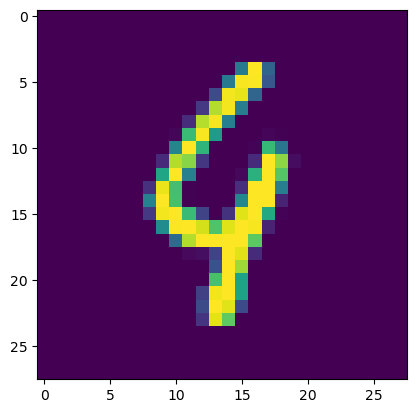

In [7]:
#F = torch.load("MNIST.pt", weights_only = False)
a = 115

img = test[a][0].reshape(28,28)
plt.imshow(img)

y_array = F(img.reshape(1,28*28))
print(f"AI의 제안 : {torch.argmax(y_array)}")
print(f"정답 : {test[a][1]}")